# (Flights Datasets Exploration)
## by (Raied Aljolayfi)

## Preliminary Wrangling

> These datasets reports ﬂights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.
> I will start with **2008** dataset which has **7,009,728** records

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics

#df_1987 = pd.read_csv('1987.csv')
#df_2007 = pd.read_csv('2007.csv')
df_2008 = pd.read_csv('2008.csv')

In [3]:
carrier = pd.read_csv('carriers.csv')

In [4]:
airport = pd.read_csv('Airports.csv')

In [5]:
# high-level overview of data shape and composition for df_2008
print(df_2008.shape)
print(df_2008.dtypes)

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object


In [6]:
df_2008.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [7]:
# descriptive statistics for float variables

df_2008.describe(include = float)

,DepTime,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.873482e+06,6.858079e+06,6.855029e+06,7.008884e+06,6.855029e+06,6.855029e+06,6.873482e+06,6.858079e+06,6.872670e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.333830e+03,1.481258e+03,1.273224e+02,1.288668e+02,1.040186e+02,8.168452e+00,9.972570e+00,6.860852e+00,1.645305e+01,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.780689e+02,5.052251e+02,7.018731e+01,6.940974e+01,6.743980e+01,3.850194e+01,3.531127e+01,4.933649e+00,1.133280e+01,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,1.107000e+03,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.512000e+03,1.100000e+02,1.100000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.909000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,8.000000e+00,1.900000e+01,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.400000e+03,1.379000e+03,1.435000e+03,1.350000e+03,2.461000e+03,2.467000e+03,3.080000e+02,4.290000e+02,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
# high-level overview of data shape and composition for carrier
print(carrier.shape)
print(carrier.dtypes)

(1491, 2)
Code           object
Description    object
dtype: object


In [9]:
carrier.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [10]:
# Show all carriers name
for x in range(carrier.shape[0]):
    print(x,' ',carrier.Description[x])

0   Titan Airways
1   Tradewind Aviation
2   Comlux Aviation, AG
3   Master Top Linhas Aereas Ltd.
4   Flair Airlines Ltd.
5   Swift Air, LLC
6   DCA
7   ACM AIR CHARTER GmbH
8   Maine Aviation Aircraft Charter, LLC
9   Inter Island Airways, d/b/a Inter Island Air
10   Polar Airlines de Mexico d/b/a Nova Air
11   JetClub AG
12   Vision Airlines
13   Mokulele Flight Services, Inc.
14   Metropix UK, LLP.
15   Multi-Aero, Inc. d/b/a Air Choice One
16   Flying Service N.V.
17   PSA Airlines Inc.
18   Piedmont Airlines
19   Sky Trek Int'l Airlines
20   Smokey Bay Air Inc.
21   Frontier Flying Service
22   Midway Express Airlines
23   Island Air Service
24   Regal Air
25   Canada 3000 Airlines Ltd.
26   Valley Air Express Inc.
27   Zeal 320
28   Regions Air, Inc.
29   Pacific Airways, Inc.
30   Gulfstream Int
31   Tatonduk Flying Service
32   Olson Air Service
33   Tanana Air Service
34   British Airtours Limited
35   Belize Trans Air
36   LAN Argentina
37   Lan Dominica
38   Air North
39   

475   Exec Express
476   Eagle Aviation Inc.
477   Executive Four Winds
478   Trans Europ. Airways France
479   Eagle Airline
480   Eagle Jet Charter
481   Eagle Commuter Airlines Inc.
482   Saeta Airlines
483   East Hampton Aire Inc.
484   Aer Lingus Plc
485   East. Indiana Aviation Sale
486   Aeroejecutivos C.A.
487   Emirates
488   Air Pacific Inc.
489   Ellis Air Taxi Inc.
490   Empire Airlines Inc.
491   Emerald Airlines
492   Metro Express
493   Empire Airlines Inc. (2)
494   Enterprise Airlines Inc.
495   Aeroservicios Ecuatorianos
496   All Star Airlines Inc.
497   Astar Air Cargo Inc.
498   Erie Airways Inc.
499   Empire Aero Service
500   Aero Trades (Western) Ltd.
501   Seagreen Air Transport
502   Ethiopian Airlines
503   Ecuatoriana De Aviacion
504   Air Atlanta Europe
505   Atlantic Southeast Airlines
506   Evanston Aviation
507   Rio Grande Air
508   Columbia Pacific Airlines (1)
509   Executive Charter
510   Express Airlines II
511   Export Air Del Peru S.A.
512   Execu

975   Pacific Cal Air
976   Pace Airlines
977   Pacair
978   Porter Airlines, Inc.
979   Pem-Air Limited
980   Trans Southern Airways
981   Antigua Paradise Airways
982   Air Europe S.P.A.
983   People Express Airlines Inc.
984   Pearson Aircraft
985   Prince Edward Air
986   Air Pennsylvania
987   Petro Aviation Corp.
988   Pacificair
989   Asia Pacific
990   Polynesian Airlines Ltd.
991   Phillips Airlines
992   Pinehurst Airlines Inc.
993   Phoenix Airlines
994   Piedmont Aviation Inc.
995   Pacific Island Airways
996   Pacific Int'l Airlines
997   Pakistan Int'l Airlines
998   Skyworld Airlines Inc.
999   Aero Peru
1000   Planes Inc.
1001   Planet Airways
1002   Polar Airways Inc.
1003   Pacific Missionary Aviation
1004   Pilgrim Aviation & Airlines
1005   Pan American Airways Corp.
1006   Panama Aviation
1007   Panagra Airways
1008   Pioneer Airways
1009   Pine State Airlines
1010   Polar Air Cargo Airways
1011   Potomac Air
1012   Pocono Airlines Inc.
1013   Polar International
1

In [11]:
# high-level overview of data shape and composition for airport
print(airport.shape)
print(airport.dtypes)

(3376, 7)
iata        object
airport     object
city        object
state       object
country     object
lat        float64
long       float64
dtype: object


### What is the structure of your dataset?
<br></br>
There are **7,009,728** flights details in the **2008** dataset with **29** features. Lots of variables are numeric in nature because of the importance of **Time** & **Delay**, such as (**`DepTime`**, **`ArrTime`**, **`ActualElapsedTime`**, **`ArrDelay`**, **`DepDelay`** .. and more), but the variables **`UniqueCarrier`**, **`Origin`**, and **`Dest`** are nominal variables. 
<br></br>
<br></br>
For **df_2008** dataset, here are the description of each column:
<br></br>
<br></br>
**Year:** 1987-2008
<br></br>
**Month:** 1-12
<br></br>
**DayofMonth:** 1-31
<br></br>
**DayOfWeek:** 1 (Monday) - 7 (Sunday)
<br></br>
**DepTime:** actual departure time (local, hhmm)
<br></br>
**CRSDepTime:** scheduled departure time (local, hhmm)
<br></br>
**ArrTime:** actual arrival time (local, hhmm)
<br></br>
**CRSArrTime:** scheduled arrival time (local, hhmm)
<br></br>
**UniqueCarrier:** Listing of carrier codes with full names: carriers.csv
<br></br>
**FlightNum:** flight number
<br></br>
**TailNum:** plane tail number
<br></br>
**ActualElapsedTime:** in minutes
<br></br>
**CRSElapsedTime:** in minutes
<br></br>
**AirTime:** in minutes
<br></br>
**ArrDelay:** arrival delay, in minutes
<br></br>
**DepDelay:** departure delay, in minutes
<br></br>
**Origin:** origin IATA airport code
<br></br>
**Dest:** destination IATA airport code
<br></br>
**Distance:** in miles
<br></br>
**TaxiIn:** taxi in time, in minutes
<br></br>
**TaxiOut:** taxi out time in minutes
<br></br>
**Cancelled:** was the flight cancelled? .. 1 = yes, 0 = no
<br></br>
**CancellationCode:** reason for cancellation (A = carrier, B = weather, C = National Air System 'NAS', D = security)
<br></br>
**Diverted:** 1 = yes, 0 = no
<br></br>
**CarrierDelay:** in minutes
<br></br>
**WeatherDelay:** in minutes
<br></br>
**NASDelay:** in minutes
<br></br>
**SecurityDelay:** in minutes
<br></br>
**LateAircraftDelay:** in minutes
<br></br>
<br></br>
<br></br>
For **carrier** dataset, here are the description of each column:
<br></br>
<br></br>
**Code**:
<br></br>
**Description**:
<br></br>
<br></br>
<br></br>
For **airport** dataset, here are the description of each column:
<br></br>
<br></br>
**iata**: the international airport abbreviation code
<br></br>
**name**: of the airport
<br></br>
**city**, **state**, and **country**: in which airport is located.
<br></br>
**lat** and **long**: the latitude and longitude of the airport
<br></br>
<br></br>
### What is/are the main feature(s) of interest in your dataset?

> I am interesting in which carrier has more flights and less delay than the others. Also, are there certain destination or arrival cities that are home to more delays or cancellations? What are the preferred times for ﬂights to occur?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **`UniqueCarrier`**, **`CarrierDelay`**, **`WeatherDelay`**, **`NASDelay`**, **`SecurityDelay`**, **`LateAircraftDelay`**, **`Carrier.Code`** & **`Airport.iata`**

## Univariate Plots

#### 1- How many flights does each carrier has

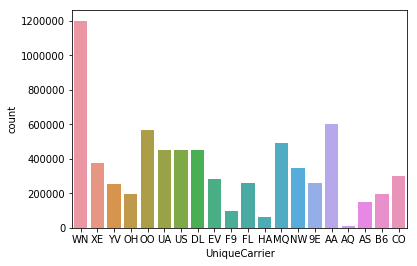

In [12]:
# First, let's plot the carriers frequency

sb.countplot(data = df_2008, x = 'UniqueCarrier');

> Let's use one color.
<br></br>
> Let's order the bars.
<br></br>
> Let's modify y ticks.

In [13]:
# Order carriers ascending for the plot

carrier_order = df_2008.UniqueCarrier.value_counts().index

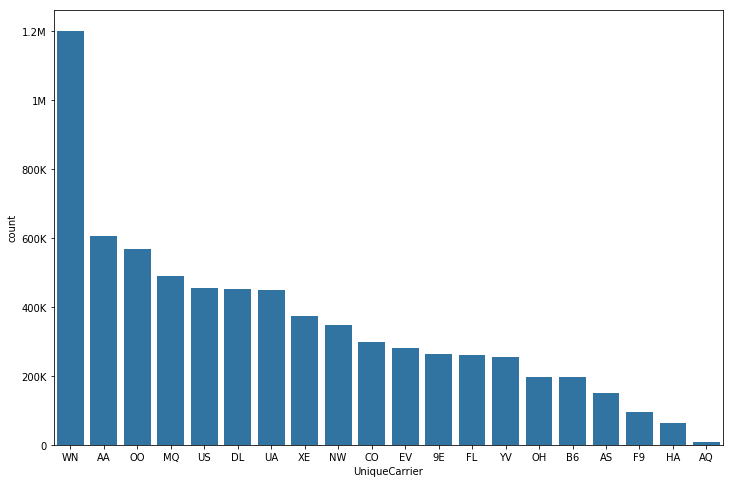

In [14]:
# First, let's plot the carriers frequency

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008, x = 'UniqueCarrier', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);

> Here we can see that the x axis contain un-meaningful values.
<br></br>
> So, we need to merge **df_2008** dataset with **carrier** dataset to get carriers name.

In [15]:
# To get and show carriers name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008, carrier, left_on='UniqueCarrier', right_on='Code')

In [16]:
# To get and show airports name in plots, let's merge the tables

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Origin', right_on='iata')

In [17]:
# Let's see the new columns

df_2008_clean.head(15)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,LateAircraftDelay,Code,Description,iata,airport,city,state,country,lat,long
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
2,2008,1,4,5,813.0,815,1035.0,1040,WN,2622,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
3,2008,1,4,5,1451.0,1450,1653.0,1710,WN,1491,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
4,2008,1,4,5,940.0,940,1140.0,1200,WN,3760,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
5,2008,1,4,5,1043.0,1045,1133.0,1145,WN,470,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
6,2008,1,4,5,630.0,630,714.0,725,WN,511,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
7,2008,1,4,5,2110.0,2100,2156.0,2200,WN,999,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
8,2008,1,4,5,1858.0,1720,1945.0,1820,WN,1394,...,76.0,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581
9,2008,1,4,5,1505.0,1505,1550.0,1605,WN,1662,...,NaN,WN,Southwest Airlines Co.,IAD,Washington Dulles International,Chantilly,VA,USA,38.944532,-77.45581


In [18]:
# After the merge
# Let's rename the columns for origin, because we have to do another merge based on Dest column

df_2008_clean.rename(columns = {'Code':'carrier_code', 'Description':'carrier_desc', 'iata':'origin_iata', 
                                'airport':'origin_airport', 'city':'origin_city', 'state':'origin_state', 
                                'country':'origin_country', 'lat':'origin_lat', 'long':'origin_long'}, inplace = True)

In [19]:
# This merge like the prvious one but it is for Dest column to show the destination airports name

df_2008_clean = pd.merge(df_2008_clean, airport, left_on='Dest', right_on='iata')

In [20]:
# After the merge
# Let's rename the columns for Dest like what we did for Origin

df_2008_clean.rename(columns = {'iata':'dest_iata', 
                                'airport':'dest_airport', 'city':'dest_city', 'state':'dest_state', 
                                'country':'dest_country', 'lat':'dest_lat', 'long':'dest_long'}, inplace = True)

In [21]:
# Order the values for our plot

carrier_order = df_2008_clean.carrier_desc.value_counts().index

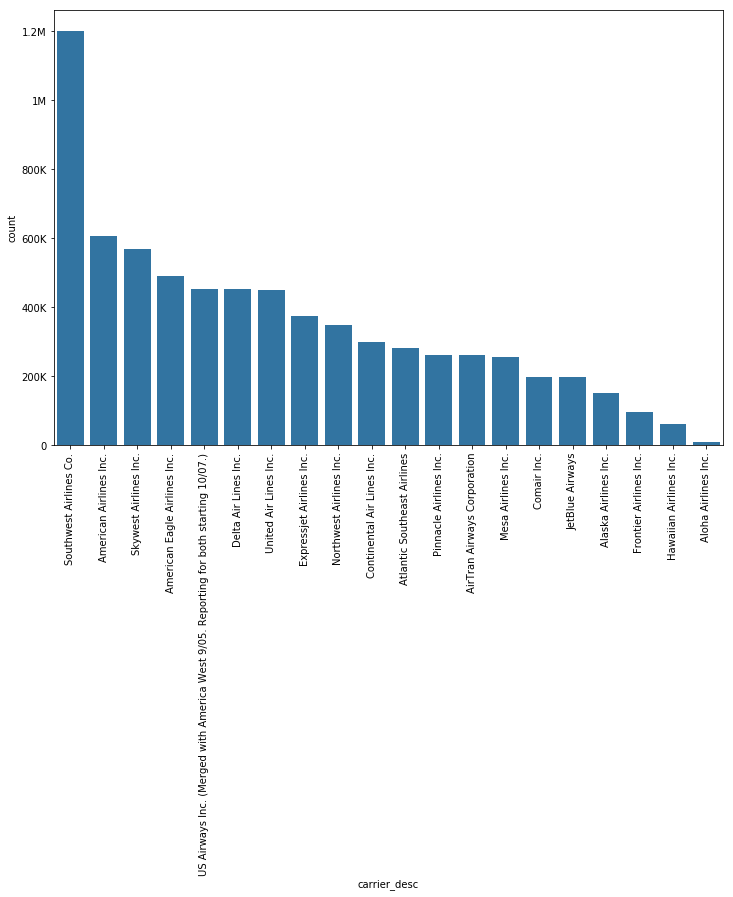

In [22]:
# So, Now we have all carrier names to show them in the plot

plt.figure(figsize = (12, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'carrier_desc', color = color_palette, order = carrier_order );
plt.yticks([0, 2e5, 4e5, 6e5, 8e5, 10e5, 12e5], ['0' ,'200K' ,'400K' ,'600K' ,'800K' ,'1M', '1.2M']);
plt.xticks(rotation = 90);

The distribution is right skewed, also the most heighst bar has almost the double value of the second most one

#### 2- How many flights does each airport has as (origin & destination)

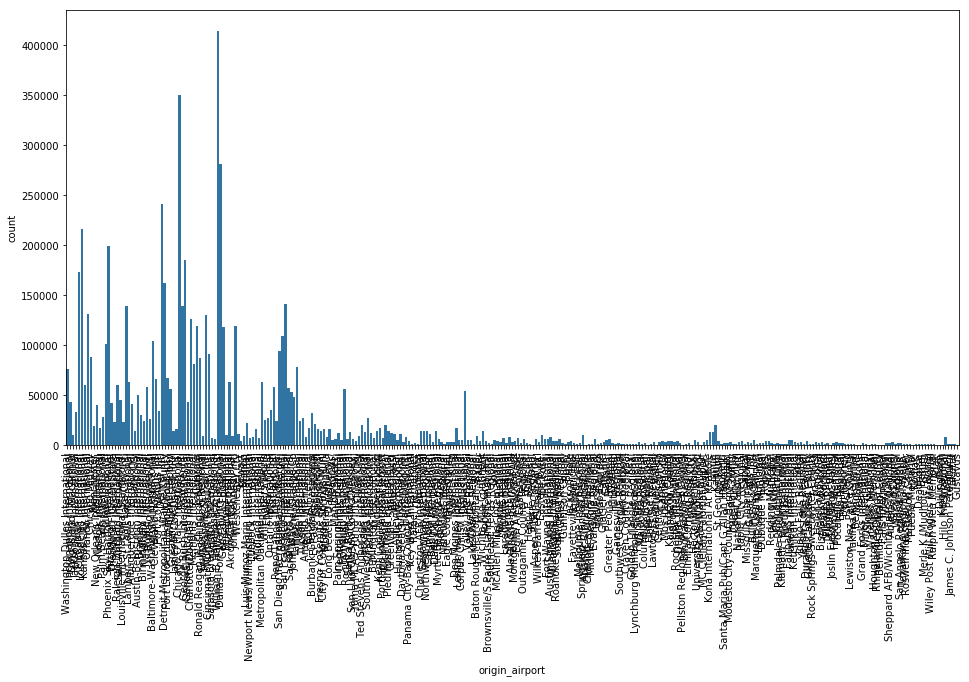

In [23]:
# Now, Let's plot the origin airports frequencies

plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette);
plt.xticks(rotation = 90);

> Let's show only the most 30 airport.
<br></br>
> Let's order the bars.
<br></br>
> Let's modify y ticks.

In [24]:
# Order the values for our plot

origin_order = df_2008_clean.origin_airport.value_counts().index

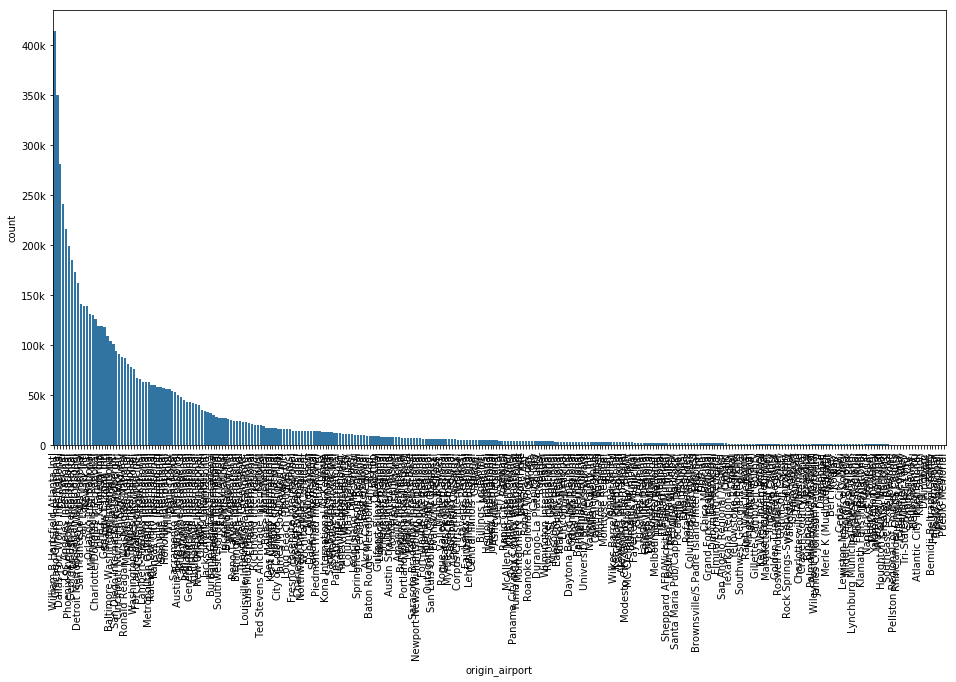

In [25]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [26]:
# To plot only first 30 airports

origin_order2 = df_2008_clean.origin_airport.value_counts().iloc[:30].index

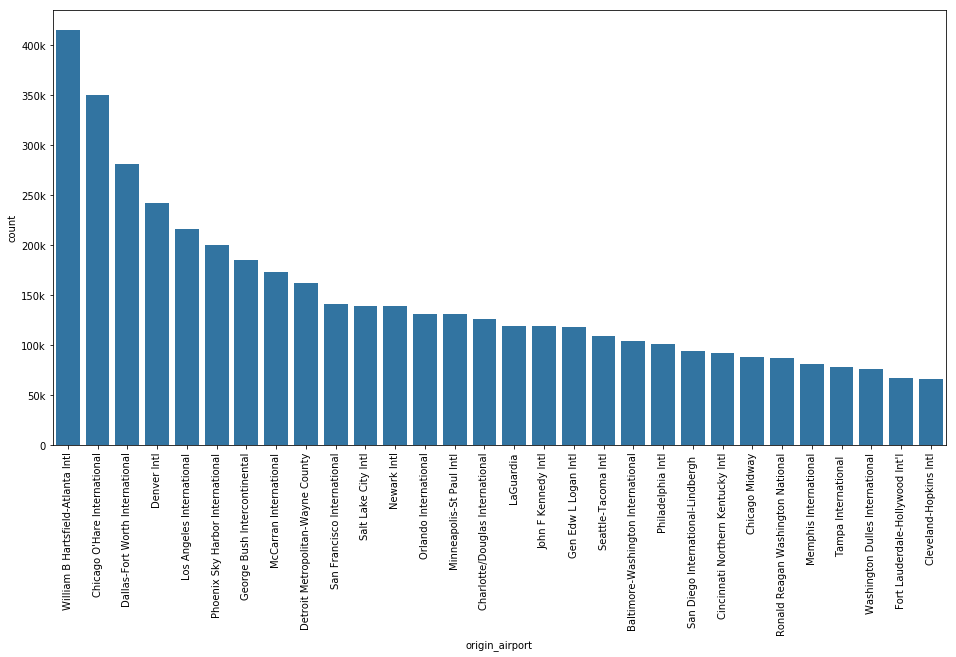

In [27]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'origin_airport', color = color_palette, order = origin_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

The above plot is for origin airports .. The distribution is right skewed, 
<br></br>
Let's do the same for destination airports.

In [28]:
# Order the values for our plot

dest_order = df_2008_clean.dest_airport.value_counts().index

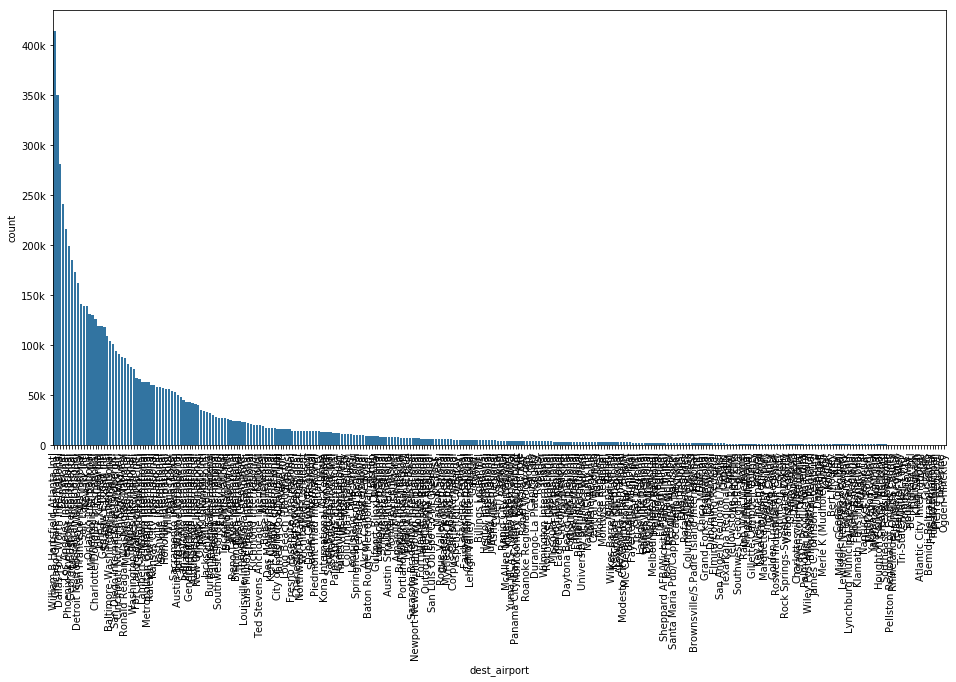

In [29]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

In [30]:
# To plot only first 30 airports

dest_order2 = df_2008_clean.dest_airport.value_counts().iloc[:30].index

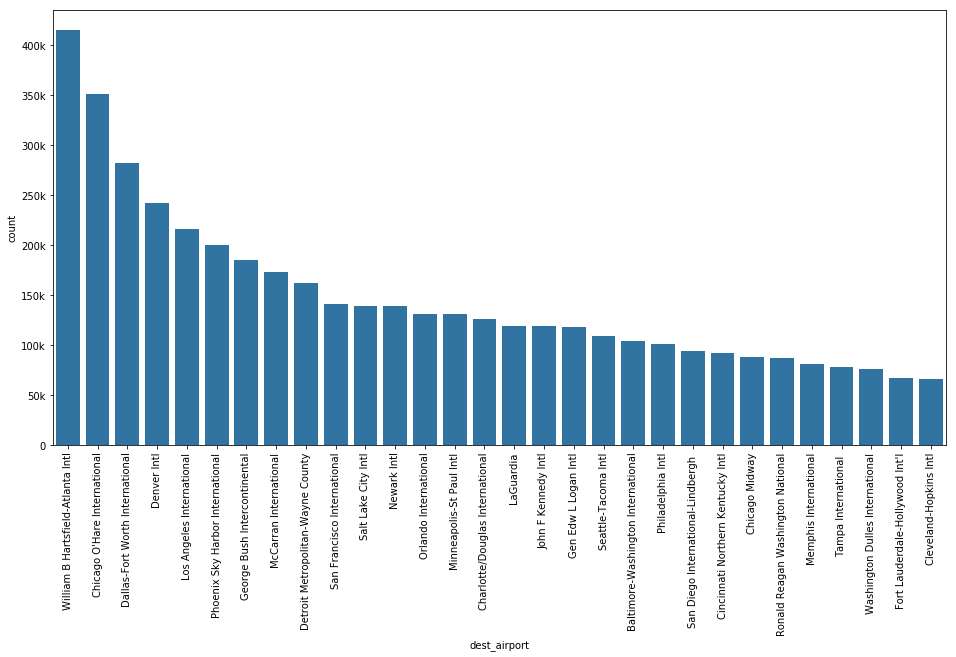

In [31]:
plt.figure(figsize = (16, 8))
color_palette = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'dest_airport', color = color_palette, order = dest_order2);
plt.yticks([0, 5e4, 10e4, 15e4, 20e4, 25e4, 30e4, 35e4, 40e4], ['0' ,'50k' ,'100k' ,'150k' ,'200k' ,'250k', '300k',
                                                                '350k', '400k']);
plt.xticks(rotation = 90);

The above plot is for destination airports. The distribution is right skewed, the order is the same for origin at least for these 30 airports which make sence during to for example the size of the airport.

#### 3- The Cause of the Cancelled Flights

In [32]:
# A = carrier, B = weather, C = National Air System 'NAS', D = security

df_2008_clean.groupby('CancellationCode').UniqueCarrier.count()

CancellationCode
A    54330
B    54904
C    28188
D       12
Name: UniqueCarrier, dtype: int64

In [33]:
# Let's systematically show the statistics of cancellation

df_2008_clean.groupby(['Cancelled', 'CancellationCode', 'carrier_desc']).Year.count()

Cancelled  CancellationCode  carrier_desc                                                                       
1          A                 AirTran Airways Corporation                                                             815
                             Alaska Airlines Inc.                                                                   1222
                             Aloha Airlines Inc.                                                                      42
                             American Airlines Inc.                                                                 9609
                             American Eagle Airlines Inc.                                                           3644
                             Atlantic Southeast Airlines                                                            1384
                             Comair Inc.                                                                            1328
                             Continental

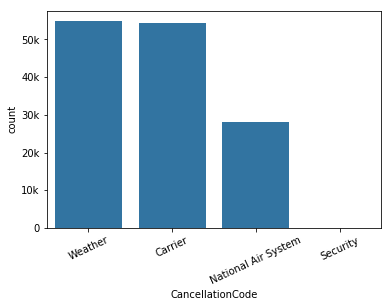

In [34]:
color_palette = sb.color_palette()[0]
labels = ['Weather', 'Carrier', 'National Air System', 'Security']
fig, ax1 = plt.subplots(1,1);
#plt.figure(figsize = (16, 8));
sb.countplot(data = df_2008_clean, x = 'CancellationCode', color = color_palette, ax=ax1, order=['B', 'A', 'C', 'D']);
ax1.set_xticklabels(labels, rotation=25);
plt.yticks([0, 1e4, 2e4, 3e4, 4e4, 5e4],['0', '10k', '20k', '30k', '40k', '50k']);

Weather and Carrier are almost the same, while NAS has a half of their value and Security almost has nothing.

#### 4- How Many Flights Does Each Hour Has
Because of the `DepTime` values stored as float, we should find a way to convert it to format like HH:MM
<br></br>
And I am interested in only HH

In [35]:
r = 2003.0
s = 754.0
t = 0030.0
u = 0003.0
d = 00.00
print(r/100, ', HH :', int(r/100))
print(s/100, ', HH :', int(s/100))
print(t/100, ', HH :', int(t/100))
print(u/100, ', HH :', int(u/100))
print(d/100, ', HH :', int(d/100))

20.03 , HH : 20
7.54 , HH : 7
0.3 , HH : 0
0.03 , HH : 0
0.0 , HH : 0


In [36]:
# Now, Let's create a new column called DepTimeHH to store the hour

df_2008_clean['DepTimeHH'] = df_2008_clean['DepTime']/100

In [37]:
# Check if there is any null values

df_2008_clean.DepTimeHH.isnull().sum()

136246

In [38]:
# Fill null values with -1 to distinguish between these null values and other values

df_2008_clean['DepTimeHH'] = df_2008_clean['DepTimeHH'].fillna(-1).astype(int)

In [39]:
# Check if there is any null values

df_2008_clean.DepTimeHH.isnull().sum()

0

In [40]:
# Show the new column DepTimeHH

df_2008_clean.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_lat,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,DepTimeHH
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
2,2008,1,4,5,2002.0,1955,2208.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
3,2008,1,4,5,734.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
4,2008,1,5,6,2000.0,1955,2214.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20
5,2008,1,5,6,731.0,735,938.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
6,2008,1,6,7,1959.0,1955,2211.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
7,2008,1,6,7,734.0,735,935.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7
8,2008,1,7,1,1951.0,1955,2159.0,2225,WN,335,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19
9,2008,1,7,1,737.0,735,1000.0,1000,WN,3231,...,38.944532,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7


In [41]:
df_2008_clean.groupby('DepTimeHH').DepTime.count()

DepTimeHH
-1          0
 0      19847
 1       5861
 2       1851
 3        833
 4       3390
 5     148167
 6     446737
 7     436700
 8     449224
 9     434850
 10    431460
 11    444702
 12    424249
 13    435917
 14    416875
 15    411126
 16    434017
 17    432488
 18    400784
 19    387288
 20    285991
 21    254850
 22    119651
 23     46103
 24       521
Name: DepTime, dtype: int64

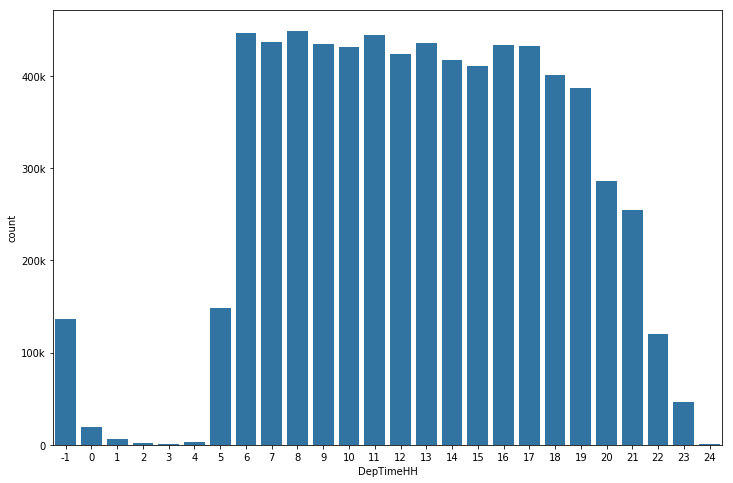

In [42]:
plt.figure(figsize = (12, 8))
color_palatte = sb.color_palette()[0]
sb.countplot(data = df_2008_clean, x = 'DepTimeHH', color = color_palette);
plt.yticks([0, 10e4, 20e4, 30e4, 40e4],['0', '100k', '200k', '300k', '400k']);

The plot shows that the peak hours are from 6:00 to 19:00 as we can see, The plot also shows HH = 24, while there is no 24:00 and it seems that it is because of round 2359.5 in the original dataset

In [43]:
# Let's check for DepTime values > 2358.0 in the original dataset

df_2008_clean.query('DepTime > 2358')['DepTime']

6129       2359.0
6151       2400.0
6173       2400.0
6177       2400.0
6251       2400.0
6291       2359.0
6366       2359.0
6374       2359.0
6421       2359.0
40170      2359.0
60148      2359.0
64504      2400.0
68195      2400.0
71857      2400.0
83779      2400.0
99293      2400.0
134282     2359.0
177908     2359.0
211472     2400.0
214228     2400.0
223199     2400.0
238110     2400.0
245604     2359.0
260476     2359.0
260500     2400.0
260547     2400.0
260559     2359.0
260611     2359.0
260741     2359.0
260789     2359.0
            ...  
6707598    2359.0
6707834    2359.0
6708127    2359.0
6708406    2400.0
6708656    2400.0
6708968    2400.0
6718666    2359.0
6743088    2400.0
6747230    2359.0
6754698    2400.0
6767719    2359.0
6774046    2400.0
6780457    2400.0
6792128    2400.0
6799658    2359.0
6799768    2400.0
6800306    2400.0
6807481    2359.0
6823324    2400.0
6838868    2400.0
6840153    2400.0
6840163    2359.0
6841534    2359.0
6865483    2400.0
6869670   

#### 5- Delay Analysis:
### Delay Analysis:

In [45]:
# Add up all delay values for each row and store the value in a new column called delay_period

df_2008_clean['delay_period'] = (df_2008_clean.CarrierDelay + df_2008_clean.WeatherDelay + df_2008_clean.NASDelay + 
                                df_2008_clean.SecurityDelay + df_2008_clean.LateAircraftDelay)

In [46]:
# Show the new column

df_2008_clean.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,origin_long,dest_iata,dest_airport,dest_city,dest_state,dest_country,dest_lat,dest_long,DepTimeHH,delay_period
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7,NaN
2,2008,1,4,5,2002.0,1955,2208.0,2225,WN,335,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20,NaN
3,2008,1,4,5,734.0,735,938.0,1000,WN,3231,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7,NaN
4,2008,1,5,6,2000.0,1955,2214.0,2225,WN,335,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,20,NaN
5,2008,1,5,6,731.0,735,938.0,1000,WN,3231,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7,NaN
6,2008,1,6,7,1959.0,1955,2211.0,2225,WN,335,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19,NaN
7,2008,1,6,7,734.0,735,935.0,1000,WN,3231,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7,NaN
8,2008,1,7,1,1951.0,1955,2159.0,2225,WN,335,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,19,NaN
9,2008,1,7,1,737.0,735,1000.0,1000,WN,3231,...,-77.45581,TPA,Tampa International,Tampa,FL,USA,27.975472,-82.53325,7,NaN


In [47]:
# Create a new dataframe called delay to store the dealy features

delay = df_2008_clean[["carrier_desc", "origin_airport", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay", "delay_period"]]

In [48]:
# Store only non null values

delay = delay.query('delay_period > 0')

In [49]:
# Show the new dataframe
delay.head(10)

,carrier_desc,origin_airport,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_period
21,Southwest Airlines Co.,Washington Dulles International,0.0,0.0,0.0,0.0,45.0,45.0
29,Southwest Airlines Co.,Washington Dulles International,0.0,0.0,19.0,0.0,64.0,83.0
30,Southwest Airlines Co.,Washington Dulles International,26.0,0.0,9.0,0.0,0.0,35.0
33,Southwest Airlines Co.,Washington Dulles International,0.0,0.0,20.0,0.0,0.0,20.0
59,Southwest Airlines Co.,Washington Dulles International,2.0,0.0,0.0,0.0,48.0,50.0
62,Southwest Airlines Co.,Washington Dulles International,0.0,0.0,0.0,0.0,23.0,23.0
80,Southwest Airlines Co.,Washington Dulles International,0.0,33.0,0.0,0.0,32.0,65.0
81,Southwest Airlines Co.,Washington Dulles International,0.0,173.0,10.0,0.0,0.0,183.0
82,Southwest Airlines Co.,Washington Dulles International,5.0,0.0,0.0,0.0,139.0,144.0
89,Southwest Airlines Co.,Washington Dulles International,46.0,0.0,0.0,0.0,0.0,46.0


In [50]:
# Show systematically statistics

delay.describe()

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,delay_period
count,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01,5.682167e+01
std,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01,5.716352e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01
50%,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,3.700000e+01
75%,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01,6.900000e+01
max,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03,2.461000e+03


In [51]:
# Total number of delays pre carrier

delay.carrier_desc.value_counts()

Southwest Airlines Co.                                                                 219757
American Airlines Inc.                                                                 163024
United Air Lines Inc.                                                                  116072
American Eagle Airlines Inc.                                                           113672
Skywest Airlines Inc.                                                                  105245
Delta Air Lines Inc.                                                                    98840
Expressjet Airlines Inc.                                                                87883
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)     82933
Northwest Airlines Inc.                                                                 77218
Continental Air Lines Inc.                                                              73047
Atlantic Southeast Airlines                                 

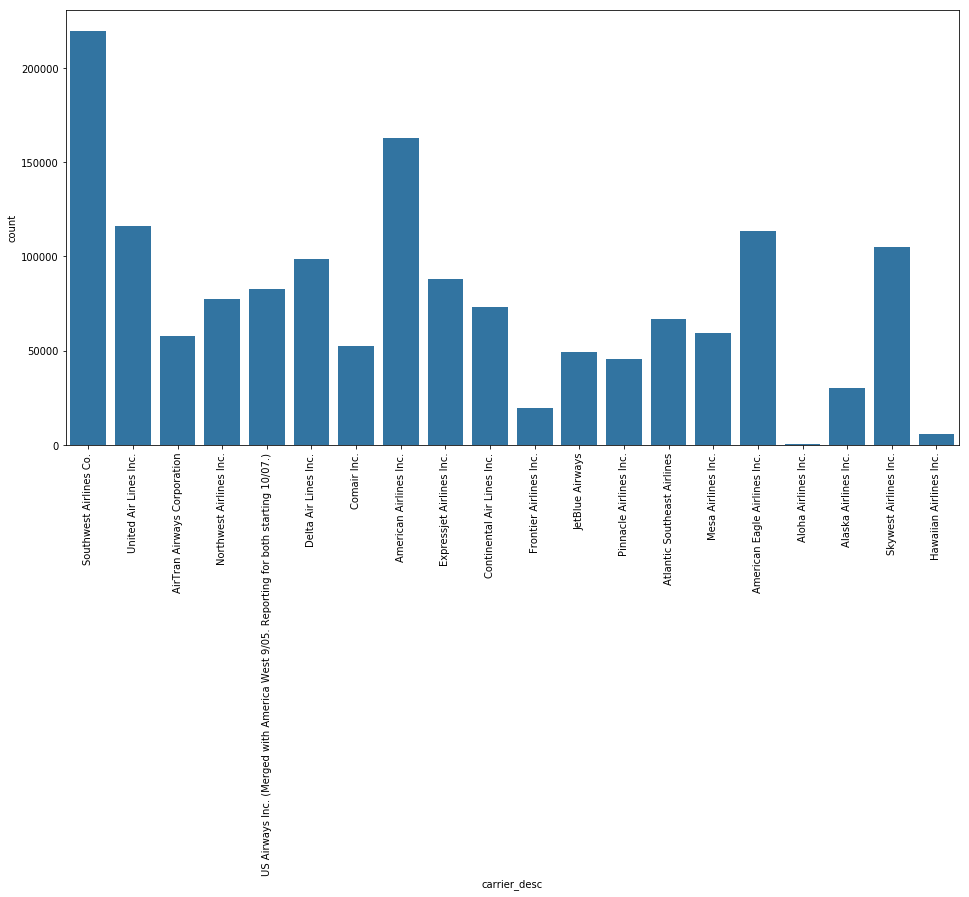

In [53]:
# Plot the Total number of delays pre carrier

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette);
plt.xticks(rotation=90);

In [54]:
# Order the value for the plot

order_c = delay['carrier_desc'].value_counts().index

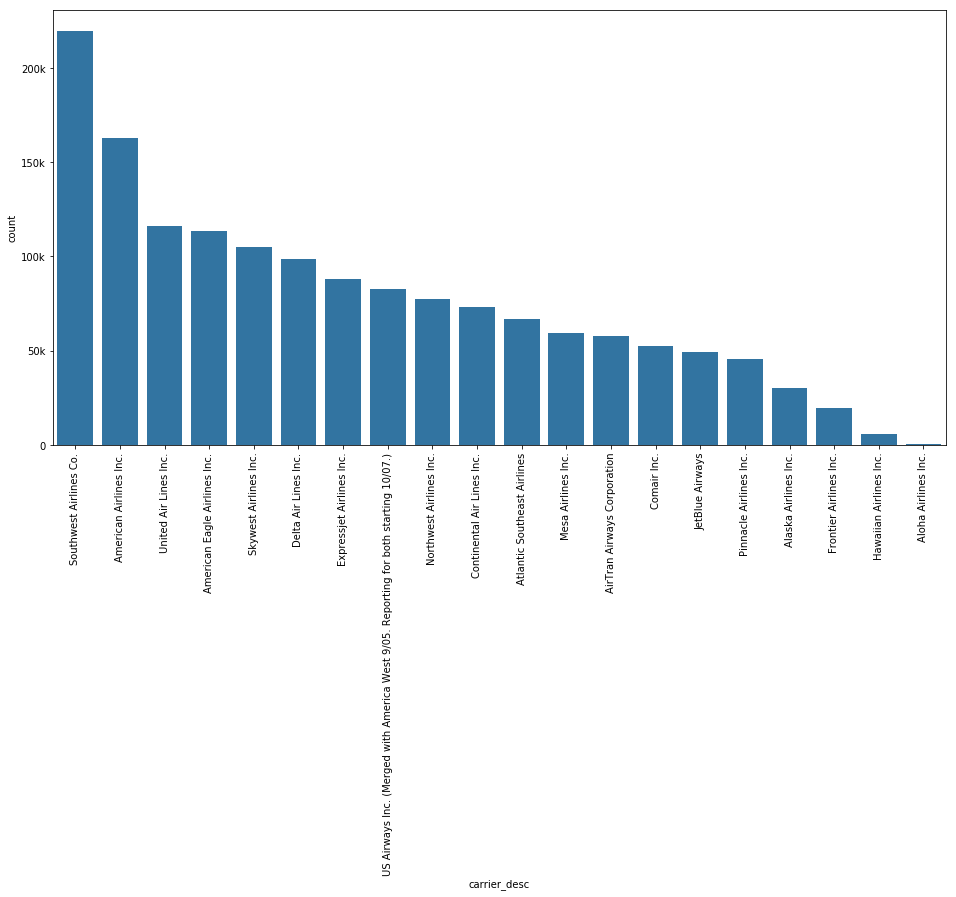

In [57]:
# Plot the Total number of delays pre carrier with bars order

plt.figure(figsize = (16, 8));
sb.countplot(data = delay, x = 'carrier_desc', color = color_palette, order = order_c);
plt.xticks(rotation=90);
plt.yticks([0, 50e3, 100e3, 150e3, 200e3],['0', '50k', '100k', '150k', '200k']);

This plot show the total number of delay per carrier. But we need the plot to be as proportions to get an accurate conclusions.

I need a bar for carrier_desc count() and another bar for delay_period count()

I need a bar for carrier_desc count() and another bar for delay_period sum()

This way I can see the percentages for each carrier in terms of delay

In [58]:
# Create a new dataframe called delay_prop to store the proportion of delay per carrier

delay_prop = pd.DataFrame(columns=['carrier_desc', 'prop'])
delay_prop

,carrier_desc,prop


In [59]:
# Show The proportion of number of times for delay depending on the number of flights for 2008

df_2008_clean.groupby(['carrier_desc']).delay_period.count() / df_2008_clean.carrier_desc.value_counts()

AirTran Airways Corporation                                                            0.221347
Alaska Airlines Inc.                                                                   0.199799
Aloha Airlines Inc.                                                                    0.050513
American Airlines Inc.                                                                 0.269512
American Eagle Airlines Inc.                                                           0.231656
Atlantic Southeast Airlines                                                            0.237220
Comair Inc.                                                                            0.265851
Continental Air Lines Inc.                                                             0.244750
Delta Air Lines Inc.                                                                   0.218706
Expressjet Airlines Inc.                                                               0.234661
Frontier Airlines Inc.                  

In [ ]:
d = {'prop': df_2008_clean.groupby(['carrier_desc']).delay_period.count() / df_2008_clean.carrier_desc.value_counts()}
delay_prop = pd.DataFrame(data=d)
delay_prop.reset_index(level=0, inplace=True)
delay_prop.rename(columns = {'index': 'carrier_desc'}, inplace=True)
delay_prop

In [ ]:
delay_prop = pd.DataFrame(data = delay_prop[['carrier_desc','prop']].sort_values(by='prop',ascending=False))
delay_prop.reset_index(drop=True, inplace=True)
delay_prop

In [ ]:
plt.figure(figsize=(16,8))
sb.barplot(data = delay_prop, x = 'carrier_desc', y = 'prop', color = color_palatte, order = carrier_order);
plt.xticks(rotation=90)

In [ ]:
import numpy as np
print('numpy: '+np.version.full_version)
import matplotlib
print('matplotlib: '+matplotlib.__version__)
import matplotlib.pyplot as plt
%matplotlib inline

x = ["a","b","c","d"]
y1 = np.array([3,8,6,4])
y2 = np.array([10,2,4,3])

plt.figure(figsize=(12,8))

plt.bar(x, y1, label='y1')
plt.bar(x, y2 ,bottom=y1,label='y2')


# add text annotation corresponding to the values of each bar.
for xpos, ypos, yval in zip(x, y1/2, y1):
    plt.text(xpos, ypos, yval, ha="center", va="center")
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    plt.text(xpos, ypos, yval, ha="center", va="center")
# add text annotation corresponding to the "total" value of each bar
for xpos, ypos, yval in zip(x, y1+y2, y1+y2):
    plt.text(xpos, ypos, "N=%d"%yval, ha="center", va="bottom")

plt.ylim(0,14.2)

plt.legend()
